In [10]:
import pandas as pd
import numpy as np
from numpy import nan
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt

In [3]:
path = "TODFinalData.csv"
data = pd.read_csv(path)
data.columns

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'Q0', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q6_7_TEXT', 'Q7',
       'Q8#1_1', 'Q8#1_2', 'Q8#1_3', 'Q8#2_1', 'Q8#2_2', 'Q8#2_3',
       'QBhairav flute', 'Q2VrundavaniSarang', 'Q(Malkauns-flute)',
       'Q(Bhupali - flute)', 'Q5GaudSarang-concert', 'Q(Bibhas - concert)',
       'Q7jaijaivant-concert', 'Q8Shankara', 'Q(Aeolian)', 'Q(Dorian)',
       'Q(Ionian)', 'Q(Lydian)', 'Q(Mixolydian)', 'Q(Phrygian)',
       'Q1aBhupali song', 'Q1b', 'Q2a', 'Q2b', 'Q3a(Malkauns song)', 'Q3b',
       'Q4a(Bhairav song)', 'Q4b', 'Q', 'SC0'],
      dtype='object')

In [4]:
required=["Progress", 'Q0', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8#1_1', 'Q8#1_2', 'Q8#1_3', 'Q8#2_1', 'Q8#2_2', 'Q8#2_3',
       'QBhairav flute', 'Q2VrundavaniSarang', 'Q(Malkauns-flute)',
       'Q(Bhupali - flute)', 'Q5GaudSarang-concert', 'Q(Bibhas - concert)',
       'Q7jaijaivant-concert', 'Q8Shankara', 'Q(Aeolian)', 'Q(Dorian)',
       'Q(Ionian)', 'Q(Lydian)', 'Q(Mixolydian)', 'Q(Phrygian)',
       'Q1aBhupali song', 'Q1b', 'Q2a', 'Q2b', 'Q3a(Malkauns song)', 'Q3b',
       'Q4a(Bhairav song)', 'Q4b', 'Q', 'SC0']

data_mod=data[required]
data_mod = data_mod.iloc[2: , :]
display(data_mod)
print(data_mod.columns)

,Progress,Q0,Q2,Q3,Q4,Q5,Q6,Q7,Q8#1_1,Q8#1_2,...,Q1aBhupali song,Q1b,Q2a,Q2b,Q3a(Malkauns song),Q3b,Q4a(Bhairav song),Q4b,Q,SC0
2,100,1,2,1,7,3,2,4,2,2,...,1,1,4,1,3,1,3,1,"It was very interesting, and I could immediate...",3
3,100,1,2,1,7,3,2,4,2,3,...,2,1,2,1,4,1,2,1,It was very interesting and I learnt about my ...,4
4,100,1,2,1,1,3,2,5,2,1,...,4,1,1,1,2,1,3,1,Very interesting and the categories just felt ...,2
5,100,1,2,1,7,3,4,4,2,3,...,1,4,2,1,3,4,2,1,It was a very interesting survey. The data had...,1
6,100,1,2,7,NaN,3,1,4,1,1,...,2,1,2,1,1,1,3,1,"No specific question, but I'd say I knew how t...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,30,1,3,7,NaN,3,2,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
102,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
103,73,1,4,7,NaN,NaN,1,4,1,1,...,3,1,3,1,1,1,NaN,NaN,NaN,2
104,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Index(['Progress', 'Q0', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8#1_1',
       'Q8#1_2', 'Q8#1_3', 'Q8#2_1', 'Q8#2_2', 'Q8#2_3', 'QBhairav flute',
       'Q2VrundavaniSarang', 'Q(Malkauns-flute)', 'Q(Bhupali - flute)',
       'Q5GaudSarang-concert', 'Q(Bibhas - concert)', 'Q7jaijaivant-concert',
       'Q8Shankara', 'Q(Aeolian)', 'Q(Dorian)', 'Q(Ionian)', 'Q(Lydian)',
       'Q(Mixolydian)', 'Q(Phrygian)', 'Q1aBhupali song', 'Q1b', 'Q2a', 'Q2b',
       'Q3a(Malkauns song)', 'Q3b', 'Q4a(Bhairav song)', 'Q4b', 'Q', 'SC0'],
      dtype='object')


In [5]:
data_mod.columns = ["progress", "concent", "age", "indian_lineage", "location_india", "location","sleep", 
                    "musician", "fam_hin", "fam_car","fam_wes", "train_hin","train_car", 
                    "train_wes", "bhairav_flute", "vs_flute", "malkauns_flute","bhupali_flute",
                    "gs_concert", "bibhas_concert", "jv_concert", "shankara_concert", 
                   "aeolian", "dorian", "ionion", "lydian", "myxolydian", "phrygian", 
                   "bhupali_movie", "recog_bhupali_movie", "vs_movie", "recog_vs_movie", 
                   "malkauns_movie", "recog_malkauns_movie", "bhairav_movie", "recog_bhairav_movie", 
                   "thoughts", "score"]
# data_mod.fillna(0)
# df.replace(np.nan, 0)

# for i in data_mod:
#     data_mod[i] = data_mod[i].astype(int)
#     data_mod[i]= data_mod[i].replace(np.nan, 0)
    
# display(data_mod)


In [6]:
#66 = 26 (indians) + 40(non-indians)
#final data of those whose progress = 100% & those who concented to participate

complete_data = data_mod[(data_mod["progress"] == '100') & (data_mod["concent"] == '1')]
complete_data=complete_data.drop(['progress', 'concent'], axis=1)

#data of Indian participants
indians = complete_data[complete_data["indian_lineage"]=='1']

#data of Non-Indian participants
nonindians = complete_data[complete_data["indian_lineage"]=='7']
nonindians=nonindians.drop(['location_india'], axis=1)

display(len(indians.index))
display(len(nonindians.index))

26

40

# Helper Functions

In [8]:
def plot_pie(df, labels, title):
    plt.title(title)
    plt.pie(df, labels = labels, shadow=True) 
    plt.show()

# def plot_bar(df)

# Cultural Distribution

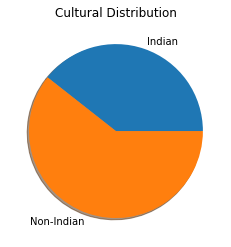

In [11]:
plot_pie([len(indians.index),len(nonindians.index)] ,['Indian', 'Non-Indian'], "Cultural Distribution")

# Age distribution
2: 18-30 \
3: 31-45 \
4: 46-60 \
5: Over 60

In [12]:
print("complete_data: ", complete_data["age"].unique())
print("indian_rows: ", indians["age"].unique())
print("nonindian_rows: ",  nonindians["age"].unique())

complete_data:  ['2' '3' '5' '4']
indian_rows:  ['2' '3']
nonindian_rows:  ['2' '5' '3' '4']


In [13]:
import matplotlib.pyplot as plt

# for i in complete_age:
#     complete_age[i] = complete_age.astype(int)
    
# [print(k) for k in complete_data.groupby(["age"])][0]

# complete_age
complete_age = complete_data.groupby(["age"]).size().reset_index(name='Count')
indian_age = indians.groupby(["age"]).size().reset_index(name='Count')
nonind_age = nonindians.groupby(["age"]).size().reset_index(name='Count')

complete_age['norm']= complete_age['Count']/complete_age['Count'].abs().max()
indian_age['norm']= indian_age['Count']/indian_age['Count'].abs().max()
nonind_age['norm']= nonind_age['Count']/nonind_age['Count'].abs().max()


display(complete_age)
display(indian_age)
display(nonind_age)




,age,Count,norm
0,2,43,1.000000
1,3,17,0.395349
2,4,2,0.046512
3,5,4,0.093023


,age,Count,norm
0,2,23,1.000000
1,3,3,0.130435


,age,Count,norm
0,2,20,1.0
1,3,14,0.7
2,4,2,0.1
3,5,4,0.2


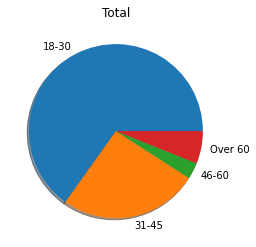

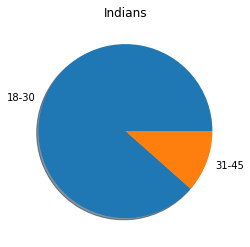

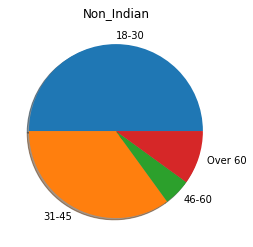

In [14]:
agegroup = ['18-30','31-45', '46-60','Over 60']
plot_pie(complete_age["Count"],agegroup, "Total")

agegroup_indians = ['18-30','31-45']
plot_pie(indian_age["Count"],agegroup_indians, "Indians")

plot_pie(nonind_age["Count"],agegroup, "Non_Indian")



In [15]:
#  pd.DataFrame(complete_age["norm"],indian_age["norm"], nonind_age["norm"], 
              
columns=["total", "ind", "nonind"]
agegroup = ['18-30','31-45', '46-60','Over 60']
df = pd.DataFrame(columns = columns)
df["total"] = complete_age["Count"]
df["ind"] =  indian_age["Count"]
df["nonind"] = nonind_age["Count"]
df.index=agegroup
df=df.fillna(0)
display(df)

df2 = pd.DataFrame(columns = columns)
df2["total"] = complete_age["norm"]
df2["ind"] =  indian_age["norm"]
df2["nonind"] = nonind_age["norm"]
df2.index=agegroup
df2=df2.fillna(0)
display(df2)

,total,ind,nonind
18-30,43,23.0,20
31-45,17,3.0,14
46-60,2,0.0,2
Over 60,4,0.0,4


,total,ind,nonind
18-30,1.000000,1.000000,1.0
31-45,0.395349,0.130435,0.7
46-60,0.046512,0.000000,0.1
Over 60,0.093023,0.000000,0.2


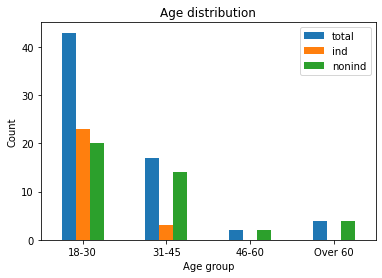

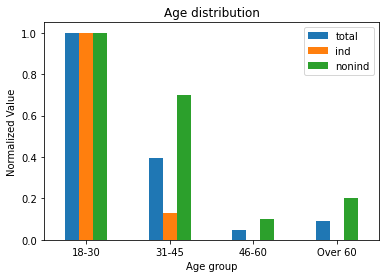

In [16]:
ax = df.plot.bar(rot=0, title="Age distribution", xlabel="Age group", ylabel="Count")
ax2 = df2.plot.bar(rot=0, title="Age distribution", xlabel="Age group", ylabel="Normalized Value")


# Stimuli
Ragas stimuli- \
	1. bhairav_flute \
	2. vs_flute \
	3. "malkauns_flute \
	4. "bhupali_flute", \
	5. "gs_concert",  \
	6. "bibhas_concert",  \
	7. "jv_concert",  \
	8. "shankara_concert", \
	9.  "aeolian",  \
	10. "dorian",  \
	11. "ionion", \
	12.  "lydian",  \
	13. "myxolydian",  \
    14. "phrygian \
	15. bhupali_movie \
	16. vs_movie \
	17. malkauns_movie \
	18. bhairav_movie 

In [17]:
print(complete_data.columns)
display(complete_data)


Index(['age', 'indian_lineage', 'location_india', 'location', 'sleep',
       'musician', 'fam_hin', 'fam_car', 'fam_wes', 'train_hin', 'train_car',
       'train_wes', 'bhairav_flute', 'vs_flute', 'malkauns_flute',
       'bhupali_flute', 'gs_concert', 'bibhas_concert', 'jv_concert',
       'shankara_concert', 'aeolian', 'dorian', 'ionion', 'lydian',
       'myxolydian', 'phrygian', 'bhupali_movie', 'recog_bhupali_movie',
       'vs_movie', 'recog_vs_movie', 'malkauns_movie', 'recog_malkauns_movie',
       'bhairav_movie', 'recog_bhairav_movie', 'thoughts', 'score'],
      dtype='object')


,age,indian_lineage,location_india,location,sleep,musician,fam_hin,fam_car,fam_wes,train_hin,...,bhupali_movie,recog_bhupali_movie,vs_movie,recog_vs_movie,malkauns_movie,recog_malkauns_movie,bhairav_movie,recog_bhairav_movie,thoughts,score
2,2,1,7,3,2,4,2,2,3,1,...,1,1,4,1,3,1,3,1,"It was very interesting, and I could immediate...",3
3,2,1,7,3,2,4,2,3,1,2,...,2,1,2,1,4,1,2,1,It was very interesting and I learnt about my ...,4
4,2,1,1,3,2,5,2,1,2,2,...,4,1,1,1,2,1,3,1,Very interesting and the categories just felt ...,2
5,2,1,7,3,4,4,2,3,1,1,...,1,4,2,1,3,4,2,1,It was a very interesting survey. The data had...,1
6,2,7,NaN,3,1,4,1,1,2,1,...,2,1,2,1,1,1,3,1,"No specific question, but I'd say I knew how t...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,2,7,NaN,NaN,4,4,1,1,2,1,...,1,1,2,1,3,1,4,1,I never listen to this type of music and the t...,3
84,2,7,NaN,NaN,2,4,1,1,3,1,...,1,1,2,1,3,1,4,1,"It was quite difficult, but the music was inte...",4
85,2,7,NaN,NaN,2,4,1,1,3,1,...,1,1,1,1,3,1,4,1,It wa interenting,0
86,2,7,NaN,NaN,2,4,1,1,1,1,...,1,1,2,1,3,1,2,1,It was very interesting,3


,bhairav_flute,vs_flute,malkauns_flute,bhupali_flute,gs_concert,bibhas_concert,jv_concert,shankara_concert,aeolian,dorian,ionion,lydian,myxolydian,phrygian,bhupali_movie,vs_movie,malkauns_movie,bhairav_movie
Morning,25,22,24,33,15,22,11,23,12,11,23,14,21,2,27,21,20,5
Afternoon,2,9,4,6,18,16,24,17,5,9,22,8,33,20,18,31,9,15
Evening,17,22,25,12,23,22,24,22,17,20,14,23,11,26,11,8,25,30
Night,22,13,13,15,10,6,7,4,32,26,7,21,1,18,10,6,12,16


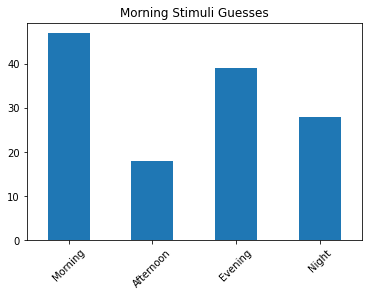

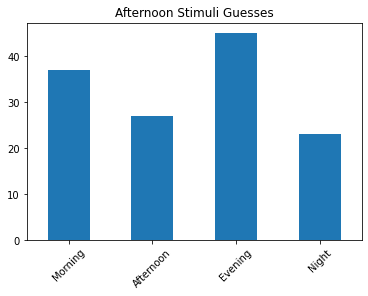

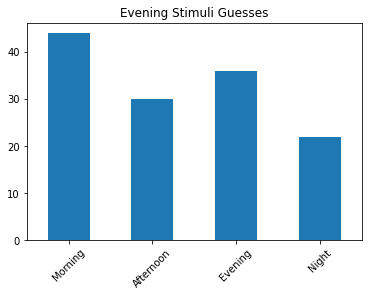

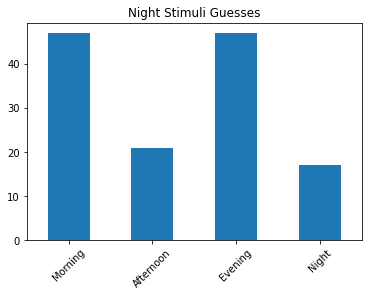

<AxesSubplot:title={'center':'Western stmiuli Guesses'}>

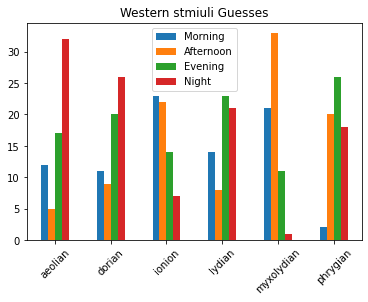

In [18]:
stimuli=pd.DataFrame(columns=['bhairav_flute', 'vs_flute', 'malkauns_flute', 'bhupali_flute',
                             'gs_concert', 'bibhas_concert', 'jv_concert', 'shankara_concert', 
                              'aeolian', 'dorian', 'ionion', 'lydian', 'myxolydian', 'phrygian', 
                              'bhupali_movie','vs_movie', 'malkauns_movie','bhairav_movie'])
for i in range(len(stimuli.columns)):
    stimuli[stimuli.columns[i]] = complete_data.groupby([stimuli.columns[i]]).size()

stimuli.index=['Morning', 'Afternoon', 'Evening', 'Night']
display(stimuli)

import warnings

warnings.filterwarnings('ignore')


morning_stimuli = stimuli[["bhairav_flute", "bibhas_concert", "bhairav_movie"]]
afternoon_stimuli = stimuli[["vs_flute", "gs_concert", "vs_movie"]]
evening_stimuli = stimuli[["bhupali_flute", "jv_concert","bhupali_movie"]]
night_stimuli = stimuli[["malkauns_flute", "shankara_concert", "malkauns_movie"]]
western_stimuli=stimuli[["aeolian",'dorian', 'ionion', 'lydian', 'myxolydian', 'phrygian']]

morning_stimuli["non_movie"] = morning_stimuli["bhairav_flute"]+morning_stimuli["bibhas_concert"]
afternoon_stimuli["non_movie"] = afternoon_stimuli["vs_flute"]+afternoon_stimuli["gs_concert"]
night_stimuli["non_movie"] = night_stimuli["malkauns_flute"]+night_stimuli["shankara_concert"]
evening_stimuli["non_movie"] = evening_stimuli["bhupali_flute"]+evening_stimuli["jv_concert"]

# display(morning_stimuli)
# display(afternoon_stimuli)
# display(evening_stimuli)
# display(night_stimuli)
# display(western_stimuli)


morning_stimuli["non_movie"].plot.bar(rot=45, title="Morning Stimuli Guesses")
plt.show()
afternoon_stimuli["non_movie"].plot.bar(rot=45, title="Afternoon Stimuli Guesses")
plt.show()
evening_stimuli["non_movie"].plot.bar(rot=45, title="Evening Stimuli Guesses")
plt.show()
night_stimuli["non_movie"].plot.bar(rot=45, title="Night Stimuli Guesses")
plt.show()
western_stimuli.T.plot.bar(rot=45, title="Western stmiuli Guesses")


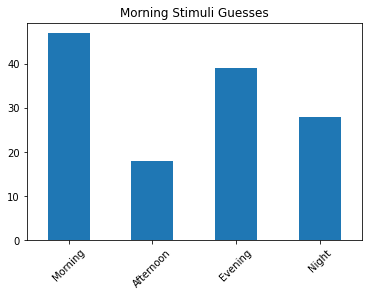

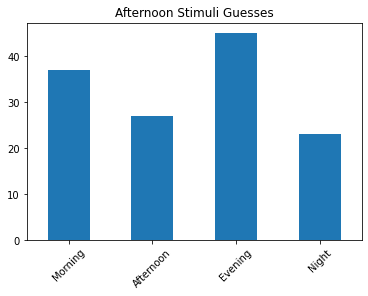

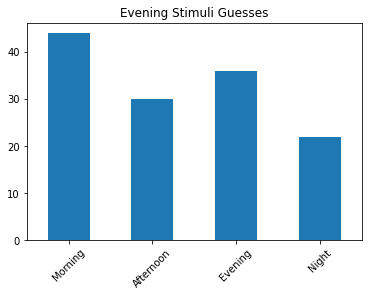

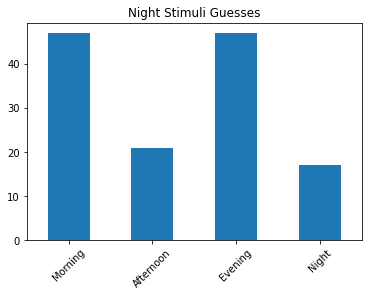

<AxesSubplot:title={'center':'Western stmiuli Guesses'}>

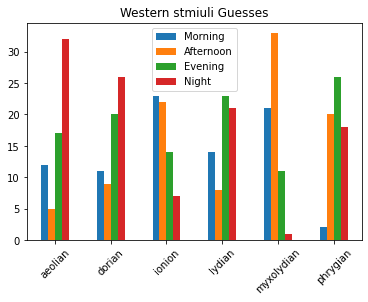

In [166]:
import warnings
warnings.filterwarnings('ignore')

stimuli=pd.DataFrame(columns=['bhairav_flute', 'vs_flute', 'malkauns_flute', 'bhupali_flute',
                             'gs_concert', 'bibhas_concert', 'jv_concert', 'shankara_concert', 
                              'aeolian', 'dorian', 'ionion', 'lydian', 'myxolydian', 'phrygian', 
                              'bhupali_movie','vs_movie', 'malkauns_movie','bhairav_movie'])
for i in range(len(stimuli.columns)):
    stimuli[stimuli.columns[i]] = indian_data.groupby([stimuli.columns[i]]).size()

stimuli.index=['Morning', 'Afternoon', 'Evening', 'Night']
display(stimuli)


morning_stimuli = stimuli[["bhairav_flute", "bibhas_concert", "bhairav_movie"]]
afternoon_stimuli = stimuli[["vs_flute", "gs_concert", "vs_movie"]]
evening_stimuli = stimuli[["bhupali_flute", "jv_concert","bhupali_movie"]]
night_stimuli = stimuli[["malkauns_flute", "shankara_concert", "malkauns_movie"]]
western_stimuli=stimuli[["aeolian",'dorian', 'ionion', 'lydian', 'myxolydian', 'phrygian']]

morning_stimuli["non_movie"] = morning_stimuli["bhairav_flute"]+morning_stimuli["bibhas_concert"]
afternoon_stimuli["non_movie"] = afternoon_stimuli["vs_flute"]+afternoon_stimuli["gs_concert"]
night_stimuli["non_movie"] = night_stimuli["malkauns_flute"]+night_stimuli["shankara_concert"]
evening_stimuli["non_movie"] = evening_stimuli["bhupali_flute"]+evening_stimuli["jv_concert"]

# display(morning_stimuli)
# display(afternoon_stimuli)
# display(evening_stimuli)
# display(night_stimuli)
# display(western_stimuli)


morning_stimuli["non_movie"].plot.bar(rot=45, title="Morning Stimuli Guesses")
plt.show()
afternoon_stimuli["non_movie"].plot.bar(rot=45, title="Afternoon Stimuli Guesses")
plt.show()
evening_stimuli["non_movie"].plot.bar(rot=45, title="Evening Stimuli Guesses")
plt.show()
night_stimuli["non_movie"].plot.bar(rot=45, title="Night Stimuli Guesses")
plt.show()
western_stimuli.T.plot.bar(rot=45, title="Western stmiuli Guesses")


,bhairav_flute,vs_flute,malkauns_flute,bhupali_flute,gs_concert,bibhas_concert,jv_concert,shankara_concert,aeolian,dorian,ionion,lydian,myxolydian,phrygian,bhupali_movie,vs_movie,malkauns_movie,bhairav_movie
Morning,11,14,10,12,5,11,5,9,6,4,7,4,10,NaN,10,9,11,1
Afternoon,2,6,1,4,6,4,8,7,3,5,8,2,9,8.0,5,11,6,4
Evening,6,2,8,4,12,7,9,9,6,10,7,12,6,9.0,5,3,8,12
Night,7,4,7,6,3,4,4,1,11,7,4,8,1,9.0,6,3,1,9


,bhairav_flute,bibhas_concert,bhairav_movie,non_movie
Morning,11,11,1,22
Afternoon,2,4,4,6
Evening,6,7,12,13
Night,7,4,9,11


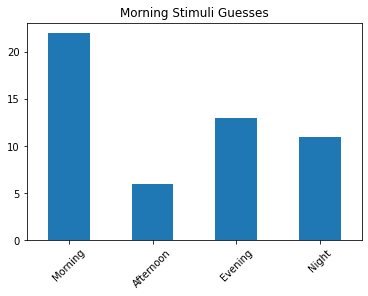

,vs_flute,gs_concert,vs_movie,non_movie
Morning,14,5,9,19
Afternoon,6,6,11,12
Evening,2,12,3,14
Night,4,3,3,7


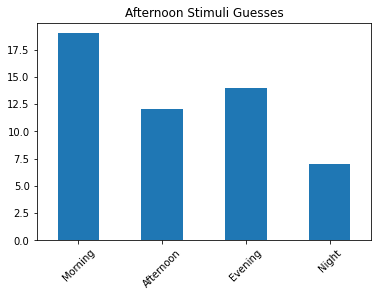

,bhupali_flute,jv_concert,bhupali_movie,non_movie
Morning,12,5,10,17
Afternoon,4,8,5,12
Evening,4,9,5,13
Night,6,4,6,10


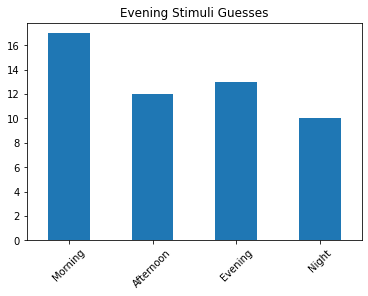

,malkauns_flute,shankara_concert,malkauns_movie,non_movie
Morning,10,9,11,19
Afternoon,1,7,6,8
Evening,8,9,8,17
Night,7,1,1,8


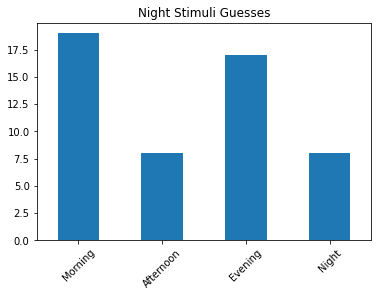

,aeolian,dorian,ionion,lydian,myxolydian,phrygian
Morning,6,4,7,4,10,NaN
Afternoon,3,5,8,2,9,8.0
Evening,6,10,7,12,6,9.0
Night,11,7,4,8,1,9.0


<AxesSubplot:title={'center':'Western stmiuli Guesses'}>

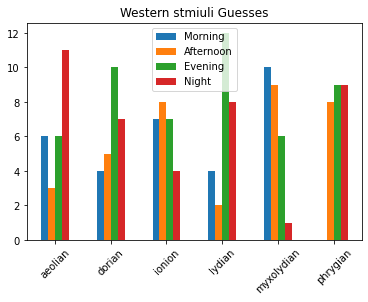

In [19]:
import warnings
warnings.filterwarnings('ignore')

stimuli=pd.DataFrame(columns=['bhairav_flute', 'vs_flute', 'malkauns_flute', 'bhupali_flute',
                             'gs_concert', 'bibhas_concert', 'jv_concert', 'shankara_concert', 
                              'aeolian', 'dorian', 'ionion', 'lydian', 'myxolydian', 'phrygian', 
                              'bhupali_movie','vs_movie', 'malkauns_movie','bhairav_movie'])
for i in range(len(stimuli.columns)):
    stimuli[stimuli.columns[i]] = indians.groupby([stimuli.columns[i]]).size()

stimuli.index=['Morning', 'Afternoon', 'Evening', 'Night']
display(stimuli)


morning_stimuli = stimuli[["bhairav_flute", "bibhas_concert", "bhairav_movie"]]
afternoon_stimuli = stimuli[["vs_flute", "gs_concert", "vs_movie"]]
evening_stimuli = stimuli[["bhupali_flute", "jv_concert","bhupali_movie"]]
night_stimuli = stimuli[["malkauns_flute", "shankara_concert", "malkauns_movie"]]
western_stimuli=stimuli[["aeolian",'dorian', 'ionion', 'lydian', 'myxolydian', 'phrygian']]

morning_stimuli["non_movie"] = morning_stimuli["bhairav_flute"]+morning_stimuli["bibhas_concert"]
afternoon_stimuli["non_movie"] = afternoon_stimuli["vs_flute"]+afternoon_stimuli["gs_concert"]
night_stimuli["non_movie"] = night_stimuli["malkauns_flute"]+night_stimuli["shankara_concert"]
evening_stimuli["non_movie"] = evening_stimuli["bhupali_flute"]+evening_stimuli["jv_concert"]

western_stimuli.fillna(0)

display(morning_stimuli)
morning_stimuli["non_movie"].plot.bar(rot=45, title="Morning Stimuli Guesses")
plt.show()

display(afternoon_stimuli)
afternoon_stimuli["non_movie"].plot.bar(rot=45, title="Afternoon Stimuli Guesses")
plt.show()

display(evening_stimuli)
evening_stimuli["non_movie"].plot.bar(rot=45, title="Evening Stimuli Guesses")
plt.show()

display(night_stimuli)
night_stimuli["non_movie"].plot.bar(rot=45, title="Night Stimuli Guesses")
plt.show()

display(western_stimuli)
western_stimuli.T.plot.bar(rot=45, title="Western stmiuli Guesses")



In [176]:

stimuli=pd.DataFrame(columns=['bhairav_flute', 'vs_flute', 'malkauns_flute', 'bhupali_flute',
                             'gs_concert', 'bibhas_concert', 'jv_concert', 'shankara_concert', 
                              'aeolian', 'dorian', 'ionion', 'lydian', 'myxolydian', 'phrygian', 
                              'bhupali_movie','vs_movie', 'malkauns_movie','bhairav_movie'])
for i in range(len(stimuli.columns)):
    stimuli[stimuli.columns[i]] = nonindians.groupby([stimuli.columns[i]]).size()

stimuli.index=['Morning', 'Afternoon', 'Evening', 'Night']
display(stimuli)


morning_stimuli = stimuli[["bhairav_flute", "bibhas_concert", "bhairav_movie"]]
afternoon_stimuli = stimuli[["vs_flute", "gs_concert", "vs_movie"]]
evening_stimuli = stimuli[["bhupali_flute", "jv_concert","bhupali_movie"]]
night_stimuli = stimuli[["malkauns_flute", "shankara_concert", "malkauns_movie"]]
western_stimuli=stimuli[["aeolian",'dorian', 'ionion', 'lydian', 'myxolydian', 'phrygian']]

morning_stimuli["non_movie"] = morning_stimuli["bhairav_flute"]+morning_stimuli["bibhas_concert"]
afternoon_stimuli["non_movie"] = afternoon_stimuli["vs_flute"]+afternoon_stimuli["gs_concert"]
night_stimuli["non_movie"] = night_stimuli["malkauns_flute"]+night_stimuli["shankara_concert"]
evening_stimuli["non_movie"] = evening_stimuli["bhupali_flute"]+evening_stimuli["jv_concert"]

western_stimuli.fillna(0)

display(morning_stimuli)
morning_stimuli["non_movie"].plot.bar(rot=45, title="Morning Stimuli Guesses")
plt.show()

display(afternoon_stimuli)
afternoon_stimuli["non_movie"].plot.bar(rot=45, title="Afternoon Stimuli Guesses")
plt.show()

display(evening_stimuli)
evening_stimuli["non_movie"].plot.bar(rot=45, title="Evening Stimuli Guesses")
plt.show()

display(night_stimuli)
night_stimuli["non_movie"].plot.bar(rot=45, title="Night Stimuli Guesses")
plt.show()

display(western_stimuli)
western_stimuli.T.plot.bar(rot=45, title="Western stmiuli Guesses")


ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

In [31]:
s_nonan=stimuli.replace(nan, 0)
# np.array(stimuli).replace(nan, 0)
s_nonan

,bhairav_flute,vs_flute,malkauns_flute,bhupali_flute,gs_concert,bibhas_concert,jv_concert,shankara_concert,aeolian,dorian,ionion,lydian,myxolydian,phrygian,bhupali_movie,vs_movie,malkauns_movie,bhairav_movie
Morning,11,14,10,12,5,11,5,9,6,4,7,4,10,0.0,10,9,11,1
Afternoon,2,6,1,4,6,4,8,7,3,5,8,2,9,8.0,5,11,6,4
Evening,6,2,8,4,12,7,9,9,6,10,7,12,6,9.0,5,3,8,12
Night,7,4,7,6,3,4,4,1,11,7,4,8,1,9.0,6,3,1,9


In [37]:
pca = PCA(n_components=4)
prcm= pca.fit_transform(np.array(s_nonan))
principal_df= pd.DataFrame(data=prcm, columns=['pc1', 'pc2', 'pc3', 'pc4'], index=stimuli.index)

In [38]:
principal_df

,pc1,pc2,pc3,pc4
Morning,16.240836,-4.666337,0.980070,1.342994e-15
Afternoon,1.332243,11.452193,-2.751800,1.342994e-15
Evening,-8.597854,-0.997654,9.673758,1.342994e-15
Night,-8.975225,-5.788203,-7.902027,1.342994e-15
